<a href="https://colab.research.google.com/github/Hasanen99/Image_Processing-Filter_applier/blob/main/(From%20Scratch)%20function_to_apply_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib.request

In [ ]:
# Read the image from the internet
url = "https://image.freepik.com/free-photo/bedroom-interior-living-area-nature-mockup-farmhouse-style-3d-rendering_41470-4069.jpg"
url_response = urllib.request.urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
bb = cv2.imdecode(img_array, -1)
# -----
org_image=cv2.cvtColor(bb,cv2.COLOR_BGR2GRAY)
bbrgb=cv2.cvtColor(bb,cv2.COLOR_BGR2RGB)
plt.imshow(org_image)
plt.show()

In [ ]:
# sfilter=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
sfilter=np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
sfilter

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [ ]:
# org_image=np.array([[10,10,200,200],[10,10,200,200],[10,10,200,200],[10,10,200,200]],dtype=np.float64)
# plt.imshow(org_image,cmap='gray')
# plt.show()

#Padding proccess

In [ ]:
def HAfilter(org_image,sfilter):
  # BY H.A.SAHIB IN 8/12/2021 
  #first make padding with the neghbour max numbers
  upperro=org_image[0,:]
  loerro=org_image[np.shape(org_image)[0]-1,:]
  left=org_image[:,0]
  right=org_image[:,np.shape(org_image)[1]-1]

  # find the corners
  UL =upperro[0] if upperro[0] > left[0] else left[0] #UL 'upper left' number=the first number of upper row if it's larger than first element of left colomn
  UR =upperro[np.shape(upperro)[0]-1] if upperro[np.shape(upperro)[0]-1] > right[0] else right[0]
  LL =loerro[0] if loerro[0] > left[np.shape(left)[0]-1] else left[np.shape(left)[0]-1]
  LR =loerro[np.shape(loerro)[0]-1] if loerro[np.shape(loerro)[0]-1] > right[np.shape(right)[0]-1] else right[np.shape(right)[0]-1]

  # add UR and LR to right colomn
  right=np.insert(right, 0, UR, axis=0)
  right=np.insert(right, np.shape(right)[0], LR, axis=0)
  #add UL and LL to left colomn
  left=np.insert(left, 0, UL, axis=0)
  left=np.insert(left, np.shape(left)[0], LL, axis=0)
  #stak the padded image
  small_image=np.r_[org_image,[loerro]] #put the lower row bellow the image
  small_image=np.r_[[upperro],small_image]         #put the image bellow the upper row
  small_image=np.c_[small_image,right]             #put the right colomn after the image
  small_image=np.c_[left,small_image]              #put the image after the left colomn

  #Now aplly filter
  filtered=np.zeros(np.shape(small_image))   #buld a copy of the same size of the original image
  for Rinst in range(np.shape(small_image)[0]-np.shape(sfilter)[0]+1):  #Rinst is the counter of rows, loop should stop if(3+Rinst==image rows) then if image rows is 7: 3+Rinst=7 then Rinst=4 so 4 jumps of rows
    rowcut=small_image[0+Rinst:np.shape(sfilter)[0]+Rinst,:] #cut first 3 rows for all image colomns
    for st in range(np.shape(small_image)[1]-np.shape(sfilter)[1]+1):   #st is the counter of colomns, the same as Rinst/ 1 is added due range() don't include the upper limit
      colcut=rowcut[:,0+st:np.shape(sfilter)[1]+st]
      multiply=colcut*sfilter
      filtered[Rinst,st]=multiply.sum() #replace the position in image which is the center of our filter
  filtered=filtered[0:np.shape(org_image)[0],0:np.shape(org_image)[1]] #take just the first part that fited the size of the original image and remove those zeros
  return filtered



In [ ]:
upperro=org_image[0,:]
loerro=org_image[np.shape(org_image)[0]-1,:]
left=org_image[:,0]
right=org_image[:,np.shape(org_image)[1]-1]

# find the corners
UL =upperro[0] if upperro[0] > left[0] else left[0] #UL 'upper left' number=the first number of upper row if it's larger than first element of left colomn
UR =upperro[np.shape(upperro)[0]-1] if upperro[np.shape(upperro)[0]-1] > right[0] else right[0]
LL =loerro[0] if loerro[0] > left[np.shape(left)[0]-1] else left[np.shape(left)[0]-1]
LR =loerro[np.shape(loerro)[0]-1] if loerro[np.shape(loerro)[0]-1] > right[np.shape(right)[0]-1] else right[np.shape(right)[0]-1]

# add UR and LR to right colomn
right=np.insert(right, 0, UR, axis=0)
right=np.insert(right, np.shape(right)[0], LR, axis=0)
#add UL and LL to left colomn
left=np.insert(left, 0, UL, axis=0)
left=np.insert(left, np.shape(left)[0], LL, axis=0)

small_image=np.r_[org_image,[loerro]] #put the lower row bellow the image
small_image=np.r_[[upperro],small_image]         #put the image bellow the upper row
small_image=np.c_[small_image,right]             #put the right colomn after the image
small_image=np.c_[left,small_image]              #put the image after the left colomn

small_image

#Apply Filter

In [ ]:
filtered=np.zeros(np.shape(small_image))   #buld a copy of the same size of the original image
for Rinst in range(np.shape(small_image)[0]-np.shape(sfilter)[0]+1):  #Rinst is the counter of rows, loop should stop if(3+Rinst==image rows) then if image rows is 7: 3+Rinst=7 then Rinst=4 so 4 jumps of rows
  rowcut=small_image[0+Rinst:np.shape(sfilter)[0]+Rinst,:] #cut first 3 rows for all image colomns
  for st in range(np.shape(small_image)[1]-np.shape(sfilter)[1]+1):   #st is the counter of colomns, the same as Rinst/ 1 is added due range() don't include the upper limit
    colcut=rowcut[:,0+st:np.shape(sfilter)[1]+st]
    multiply=colcut*sfilter
    filtered[Rinst,st]=multiply.sum() #replace the position in image which is the center of our filter
filtered=filtered[0:np.shape(org_image)[0],0:np.shape(org_image)[1]] #take just the first part that fited the size of the original image and remove those zeros


filtered
plt.imshow(abs(filtered),cmap='gray')
plt.show()


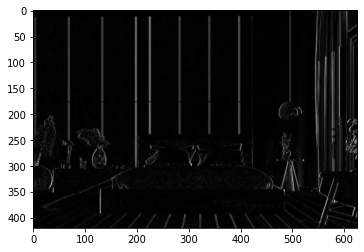

In [ ]:
pop=HAfilter(org_image=org_image,sfilter=sfilter)
plt.imshow(abs(pop),cmap='gray')
plt.show()